### Assignment for Business Analyst Intern @Jar

###### 1. Walmart Sales Analysis:

- A. Analyze the performance of sales and revenue at the city and branch level.
- B. What is the average price of an item sold at each branch of the city.
- C. Analyze the performance of sales and revenue, Month over Month across the Product line, Gender, and Payment Method, and  s      identify the focus areas to get better sales for April 2019.


## Importing important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read the Dataset

In [2]:
data=pd.read_excel("Walmart Sales.xlsx")

## Checking First & Last 5 rows of data

In [3]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3


In [4]:
data.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
995,233-67-5758,A,Naypyitaw,Normal,Male,Health and beauty,40.35,1,1/29/2019,13:46:00,Ewallet,6.2
996,303-96-2227,A,Mandalay,Normal,Female,Home and lifestyle,97.38,10,3/2/2019,17:16:00,Ewallet,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,2/9/2019,13:22:00,Cash,7.7
998,347-56-2442,B,Yangon,Normal,Male,Home and lifestyle,65.82,1,2/22/2019,15:33:00,Cash,4.1
999,849-09-3807,C,Yangon,Member,Female,Fashion accessories,88.34,7,2/18/2019,13:28:00,Cash,6.6


## Shape of the data (Rows & Columns)

In [5]:
data.shape

(1000, 12)

- Walmart dataset has 1000 rows and 12 columns

## Checking null values in the dataset

In [6]:
data.isnull().sum()

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

- There are no null values in the dataset

## Checking features information or data type

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  Rating         1000 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


- Date column having datatype as object so, i have to change the datatype as datetime and also drop unnecessary columns (Invoice ID, Time, Rating)

## Drop unnecessary columns

In [8]:
data.drop(["Invoice ID","Time","Rating"], axis=1, inplace=True)

## Change the data type

In [9]:
data["Date"]=pd.to_datetime(data["Date"])

## Now again check the dataset information

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Branch         1000 non-null   object        
 1   City           1000 non-null   object        
 2   Customer type  1000 non-null   object        
 3   Gender         1000 non-null   object        
 4   Product line   1000 non-null   object        
 5   Unit price     1000 non-null   float64       
 6   Quantity       1000 non-null   int64         
 7   Date           1000 non-null   datetime64[ns]
 8   Payment        1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 70.4+ KB


## Extracting Month & Year from Date column according to the requirment

In [11]:
data["Month"]=data["Date"].dt.month
data["Year"]=data["Date"].dt.year

## First 5 rows of data

In [12]:
data.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Payment,Month,Year
0,A,Yangon,Member,Female,Health and beauty,74.69,7,2019-01-05,Ewallet,1,2019
1,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,2019-03-08,Cash,3,2019
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,2019-03-03,Credit card,3,2019
3,B,Yangon,Member,Male,Health and beauty,58.22,8,2019-01-27,Ewallet,1,2019
4,C,Yangon,Normal,Male,Sports and travel,86.31,7,2019-02-08,Ewallet,2,2019


## Shape of the finl dataset

In [13]:
data.shape

(1000, 11)

## Checking all important features with there unique values

In [14]:
data["Branch"].unique()

array(['A', 'B', 'C'], dtype=object)

In [15]:
data["City"].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [16]:
data["Product line"].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [17]:
data["Payment"].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [18]:
data["Month"].unique()

array([1, 3, 2], dtype=int64)

In [19]:
data["Year"].unique()

array([2019], dtype=int64)

## A. Analyze the performance of sales and revenue at the city and branch level

## Sales

In [20]:
sales=data.groupby(["City","Branch"])["Unit price","Quantity"].sum()
sales

C:\Users\DELL\AppData\Local\Temp\ipykernel_3240\2259034654.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales=data.groupby(["City","Branch"])["Unit price","Quantity"].sum()


Unit price  Quantity
City      Branch                      
Mandalay  A          6349.11       637
          B          6623.73       664
          C          5506.04       519
Naypyitaw A          5953.55       648
          B          6298.64       604
          C          6315.57       579
Yangon    A          6342.88       598
          B          6329.25       631
          C          5953.36       630

- Here, in Mandalay city, Highest Unit Price is 6623 and Quantity is 664 in Branch B
- In Naypyitaw city, Highest Unit Price is 6315 and Quantity is 648 in Branch "C" & "A"
- In Yangon city, Highest Unit Price is 6343 and Quantity is 631 in Branch "A" & "B"

## Revenue

In [21]:
revenue=sales["Unit price"]*sales["Quantity"]
revenue

City       Branch
Mandalay   A         4044383.07
           B         4398156.72
           C         2857634.76
Naypyitaw  A         3857900.40
           B         3804378.56
           C         3656715.03
Yangon     A         3793042.24
           B         3993756.75
           C         3750616.80
dtype: float64

## Created a bar chart for revenue by City

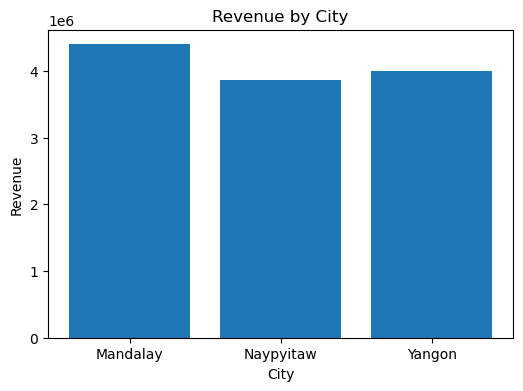

In [22]:
plt.figure(figsize=(6,4)) 
plt.bar(sales.index.get_level_values('City'), revenue)
plt.xlabel('City')
plt.ylabel('Revenue')
plt.title('Revenue by City')
plt.show()

- According to City, Mandalay City has highet Revenue

## Bar chart for Revenue by Branch

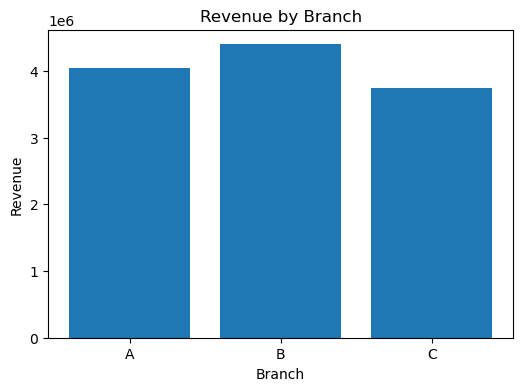

In [23]:
plt.figure(figsize=(6,4))
plt.bar(sales.index.get_level_values('Branch'),revenue)
plt.xlabel('Branch')
plt.ylabel('Revenue')
plt.title('Revenue by Branch')
plt.show()

- According to Branch, Branch-B has highest Revenue

## B. What is the average price of an item sold at each branch of the city.

In [24]:
avg_price=data.groupby(["Branch"])["Unit price"].mean()
avg_price

Branch
A    54.360175
B    56.622412
C    56.072461
Name: Unit price, dtype: float64

- Here is the average Prices according to the Branch.

## C. Analyze the performance of sales and revenue, Month over Month across th   Productline,      Gender, and Payment Method, and identify the focus areas to get better sales for April 2019.

## Month over Month Sales Analysis

In [25]:
sales_analysis=data.groupby(["Month","Product line","Gender","Payment"])[["Unit price","Quantity"]].sum()
sales_analysis.head(100)

Unit price  Quantity
Month Product line           Gender Payment                          
1     Electronic accessories Female Cash             534.48        52
                                    Credit card      371.20        54
                                    Ewallet          251.77        43
                             Male   Cash             552.72        62
                                    Credit card      433.88        43
...                                                     ...       ...
3     Health and beauty      Male   Ewallet          603.07        64
      Home and lifestyle     Female Cash             451.91        42
                                    Credit card      298.96        59
                                    Ewallet         1017.20       103
                             Male   Cash             511.87        59

[100 rows x 2 columns]

## Calculate Revenue and Compare Month Over Month Changes

In [26]:
sales_analysis["Revenue"]=sales_analysis["Unit price"]*sales_analysis["Quantity"]
monthly_changes=sales_analysis.groupby(["Product line","Gender","Payment"])["Revenue"].diff()

## Revenue

In [27]:
sales_analysis["Revenue"]

Month  Product line            Gender  Payment    
1      Electronic accessories  Female  Cash           27792.96
                                       Credit card    20044.80
                                       Ewallet        10826.11
                               Male    Cash           34268.64
                                       Credit card    18656.84
                                                        ...   
3      Sports and travel       Female  Credit card    22475.44
                                       Ewallet        26494.17
                               Male    Cash           17779.68
                                       Credit card    29002.80
                                       Ewallet        69225.70
Name: Revenue, Length: 108, dtype: float64

## Month Over Month Changes

In [28]:
monthly_changes

Month  Product line            Gender  Payment    
1      Electronic accessories  Female  Cash                NaN
                                       Credit card         NaN
                                       Ewallet             NaN
                               Male    Cash                NaN
                                       Credit card         NaN
                                                        ...   
3      Sports and travel       Female  Credit card    12273.76
                                       Ewallet       -17643.14
                               Male    Cash            5548.23
                                       Credit card    17915.79
                                       Ewallet        65681.95
Name: Revenue, Length: 108, dtype: float64

- I have analyzed sales and revenue changes by month for product lines,gender,payment.Identified focus are for boosting sales in April 2019.To make business more profitable, it is important to look at growth and decline of products. we can use this information ti decide to focus on which product,which customer to target and the payment method to use for promotions and marketing. This can help improvement in business performance.